# Monte-Carlo Models

This text was written with the assistance of ChatGPT. I used it to help with editing and understanding what parts of the text might not be clear or explained in sufficient detail. You can see a record of the chat used in the creation of this document [here](https://chatgpt.com/share/91545b16-dc45-4955-8398-2fdc2ae05d52). The particular GPT used for this has access to most of my academic writting and is pretty good at writting in my voice.


## Introduction

**Modeling** is the process by which we analyze a complex, real-world problem with the goal of making predictions about what might happen under various conditions or actions. For a model to be useful it must be simple enough to understand. (How else will you know if it is right!?) At the same time, it must describe the real world in enough detail to provide meaningful predictions.

In some cases, the questions we are interested in probing with a model could instead be probed with an experiment; however, there are numerous problems that are either too dangerous, too expensive, too expansive, or too difficult to probe experimentaly.

Take the case of neutron transmission through a material discussed in the [*The Beginning of the Monte-Carlo Method*](https://sgp.fas.org/othergov/doe/lanl/pubs/00326866.pdf). The scientists were interested in studying how different geometries effected criticality (in other words, when does a nuclear bomb go "boom"?). To study this via experiment is obviously extremely costly, dangerous to the environment, and deeply unsafe. Modeling, on the other hand, allows us to test many different configurations quickly and safely. In fact, since the 1992 when [nuclear weapons testing ceased in the US](https://en.wikipedia.org/wiki/Comprehensive_Nuclear-Test-Ban_Treaty) the US has developed all of our new nukes [purely with modeling](https://2009-2017.state.gov/t/avc/rls/202014.htm).

In other cases, we simply cannot run the experiment at all. Climate modeling is a good example of this. We only have one planet and biosphere with no "reset" button. As a direct consequence, we can not re-run the experiment. A robust climate model allows us to learn something about how the climate might evolve under numerous scenarios.

Both of these examples rely on **computer simulation**, or having a computer try to mimic reality. These are nearly always **Monte-Carlo simulations**, or simulations that rely on an element of randomness. Simulations are incredibly useful tools, but they are often more complicated to develop, test, and maintain than other modeling techniques we will cover in the future. They also allow us to model problems that would otherwise be out of reach.


### When to use simulations

We often will turn to simulation if one of the following is true:
- It is not feasible to do an experiment: like with climate models
- The experiment would be too dangerous or expensive: like with nuclear bombs
- The system we are interested in studying does not exist yet: like when designing a future experiment
- We want to explore many possible outcomes in a random system: like when we model the potential paths of a hurricane

### Disadvantages of simulations

Despite the obviously usefulness of Monte-Carlo simulations, there are many disadvantages you need to weight before embarking:
- Monte-Carlo simulations are often time-consuming (and therefore expensive) to develop and maintain.
- Monte-Carlo simulations often yield a 'good' solution, but not necessarily the 'optimal' solution, because it's impossible to test *every* possible outcome in a random system.
- The results are often difficult to verify because we might not have any real-world data to compare to yet.
- It's important to be careful when reporting the results of Monte-Carlo models, as they provide a range of possible outcomes rather than a single definitive answer.

## Randomness and chance

### Randomness and computers

The defining feature of a Monte-Carlo model is randomness. This presents an immediate challange: how do you generate random number on a deterministic system like a computer?

The short answer is you can't. But you can get damn-near close. We call these **pseudo-random numbers**.  We use a **random number generator** (which more acurately, but more verbosly, should be called a *pseduo*-random number generator) to create a list of seemingly random numbers.

The mathmetician in me feels it is important to emphasize that they are not truely random. All of these algorithms depend on something called a **seed**, which is a starting number used to initialize the sequence. Given the same algorithm and the same seed, the sequence of numbers generated will be identical every time. While the numbers appear random, they are entirely determined by this initial seed.

The mathematics that underly these generators is beyond the scope of this course. Any computational tool worth its salt has a decent random number generator built-in, and such is the case with Python's [random](https://docs.python.org/3/library/random.html) package.

### Probability

Integral to the concept of randomness is the idea of probability. Probability helps us quantify how likely an event is to occur. To understand this, we first need to define an **event**. An event is the *outcome* of a process or experiment. For example, if we flip a coin, there are two possible events: getting heads or getting tails.

For simple systems, we can define the **probability** of an event (call it $A$) as:

$$
P(A) = \frac{\text{Number of outcomes where $A$ occured}}{\text{Total number of outcomes}}
$$

This formula expresses the likelihood of event $A$ occurring as the ratio of favorable outcomes to the total number of outcomes we examined.

You will often see this notation: $P$ stands for probability, and what is in the parentheses describes the event of interest. For example, if $A$ represents getting heads when flipping a coin, and we flip the coin 100 times and get heads 50 times, then the probability of getting heads is:

$$
P(\text{heads}) = \frac{50}{100} = 0.5
$$

### Why randomness?

To understand why this randomness can be such a powerful tool, let's turn back to the example in [*The Beginning of the Monte-Carlo Method*](https://sgp.fas.org/othergov/doe/lanl/pubs/00326866.pdf). Many systems in the real world involve processes that are inherently unpredictable at the micro level, even if we can describe some aspects of them with a high degree of accuracy. This is one example.

We (that is, humanity) understand quiet well the path of a single neutron traveling through a material. We can predict certain aspects of its behavior, such as how it might interact with atoms in the material based on known reaction probabilities. However, the exact path that neutron will take is inherently random. It could scatter, be absorbed, or pass through the material without interaction. Each of these possibilities has a certain probability, but we cannot predict with certainty which will occur in any given instance.

As we scale that to many neutrons, it becomes untenable to model deterministically. Instead we model the path of many (thousands or millions) of nuetrons and record each of their paths. By looking at this collection (or **distribution**) of potential paths, we can understand what the *average* neutron will do. If we were to run our model only once, we would have no way to know if we were very lucky and the modeled path was close to the average or very unlucky and it was a *very* unlikely path. The only way to understand the answer to that question is to examine a large number of simulated paths.

That, is the power of Monte-Carlo models. They allow us to connect our understanding of the small-scale to make large-scale predictions. While we cannot predict the exact outcome of a single event (like the path of a neutron), we can use randomness to simulate many possible outcomes and then analyze the distribution of results. This distribution gives us insights into the overall behavior of the system, such as the likelihood of different outcomes, average behavior, and the spread of possible results.

This concept applies to many other fields as well. In finance, for example, the future prices of stocks are influenced by countless unpredictable factors. By using Monte-Carlo simulations, we can model a range of possible future scenarios and gain insights into the risk and potential return of an investment portfolio.

In essence, randomness allows us to model systems that are too complex to describe with deterministic equations. By embracing the inherent uncertainty and variability in these systems, Monte-Carlo simulations provide a powerful tool for understanding and predicting the behavior of complex phenomena.





## A simple Monte-Carlo

Let's look at an example of a simple Monte-Carlo model and how it compares to a deterministic method. In the future we will return to this example as we try to better understand how to acuratly report on the results of a Monte-Carlo simulation.

Here's the problem: Supose you have a function $f(x)$, plotted below, that is defined from $x=0$ to $x=10$. You want to know how much area exists under the curve described by that function.

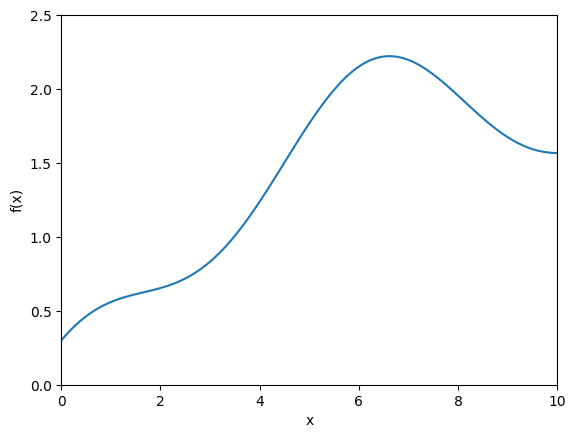

In [ ]:
# @title Plot of $f(x)$ {"display-mode":"form"}
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the function
def f(x):
    return 2*np.sin(.2*x) + .3*np.cos(x)
# Define the range of x values
x = np.linspace(0, 10, 100)

# Plot the function
plt.plot(x, f(x))
plt.ylim(0,2.5)
plt.xlim(0,10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


The mathmetian might say, "Well that's easy! Just take the integral of the function on the interval $[0,10]$." And she's right—the area can be determined deterministically using calculus. But you haven't taken calculus yet, so you need another solution.

The experimentalist might say, "Well that's easy! Just get some carboard! If we weigh the carboard, its weight will be equivalent to the total area of the plot (25). Then we can cut out the function and weight the cardboard again. The weight of the cut-out will correspond to the area under the curve. Done!"  They're right too. But you don't have any cardboard or a scale around.

It gives you an idea though... What the experimentalist proposed was:
$$
\text{area under curve} = \text{total area of plot}\times \frac{\text{weight of cardboard under curve}}{\text{weight of initial cardboard square}}
$$


What if we throw a bunch of virtual "darts" at the plot instead? By counting the number of darts that fall under the curve compared to the number of total darts we threw we can estimate the are under the curve in the same way.

$$
\text{area under curve} = \text{total area of plot} \times \frac{\text{darts under curve}}{\text{all darts thrown}}
$$

Play around with the slider below and see how things change.

Of 30 thrown, 18 were under the curve and the total area of the plot is 25.
Therefore the area under the curve is approximatly 25*18/30 = 15.0


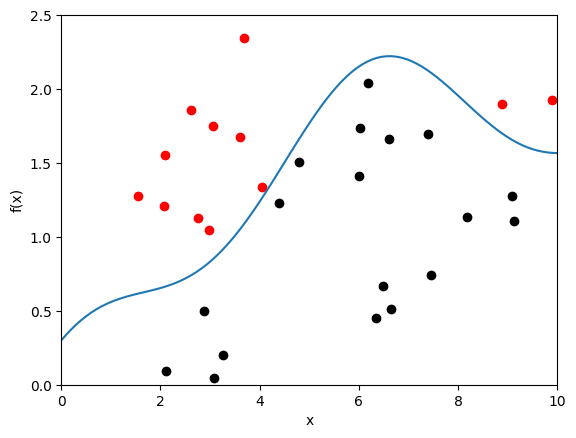

In [ ]:
# @title Throwing darts {"run":"auto","vertical-output":true,"display-mode":"form"}
number_darts = 30 # @param {"type":"slider","min":0,"max":1000,"step":10}

under = 0
x_under = []
y_under = []
x_over = []
y_over = []

for i in range(number_darts):
    x = random.uniform(0, 10)
    y = random.uniform(0, 2.5)
    if y < f(x):
        under += 1
        x_under.append(x)
        y_under.append(y)
    else:
        x_over.append(x)
        y_over.append(y)



print(f"""Of {number_darts} thrown, {under} were under the curve and the total area of the plot is 25.
Therefore the area under the curve is approximatly 25*{under}/{number_darts} = {under/number_darts*25}""")
# Define the function
def f(x):
    return 2*np.sin(.2*x) + .3*np.cos(x)
# Define the range of x values
x = np.linspace(0, 10, 100)

# Plot the function
plt.plot(x, f(x))
plt.scatter(x_under, y_under, color='black')
plt.scatter(x_over, y_over, color='red')
plt.ylim(0,2.5)
plt.xlim(0,10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

This all begs some massive questions:
- How do we know we are right? We get a different answer every time!
- How certain are we that the answer we get is close to the right answer?

These are critical questions, and ones we will leave for a later section.

# Questions

You can add answers by editing the text cells below.

### How do you think random number generators and probability are related? How are the probabilities we select any given number (say 0.2 vs 0.25) related?

### Consider applications in social sciences, biology, or economics (or your field of choice!). What are some other systems or problems, besides the ones discussed in the readings, were using a Monte-Carlo simulation might be a good idea? For the problems you identified, why not use a different method (experiment or determenistic?)

### *The Beginning of the Monte Carlo Method* describes, in some detail, the process used to simulate a neutron through matter. Where in that process were random numbers used?

### Reflect on the historical development of the Monte Carlo method as described in the reading. How did the limitations of early computational tools influence the development of this method? How do you think the usefulness of these models have changed over time?

### You're tasked with reporting the results of a Monte-Carlo climate model. How would you handle reporting your results given what you saw in the consitancy of the output in the darts example above? Describe the steps you would take to ensure that your results are reported accurately. Consider how you would address the inherent variability in the simulation outcomes and how you might communicate the range of possible scenarios to your audience.